In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [3]:
import seaborn as sns

In [4]:
!

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 825D-A908

 Directory of C:\Program Files (x86)\Python37-32\Jupyter

11/18/2018  11:39 AM    <DIR>          .
11/18/2018  11:39 AM    <DIR>          ..
11/18/2018  11:39 AM    <DIR>          .ipynb_checkpoints
11/17/2018  04:14 PM    <DIR>          DataSets
11/18/2018  11:38 AM             4,297 i590_FinalProject_Phase1_Consolidated.ipynb
11/11/2018  04:31 PM    <DIR>          notebooks
11/17/2018  03:55 PM            43,905 Phase1_Rushi.ipynb
11/11/2018  02:18 PM    <DIR>          py files
11/18/2018  11:30 AM           321,697 Rushi_Phase1_FinalProject.ipynb
11/18/2018  11:39 AM                72 Untitled.ipynb
               4 File(s)        369,971 bytes
               6 Dir(s)  188,462,944,256 bytes free


In [6]:
os.chdir('DataSets')

In [10]:
bcd = pd.read_csv('BreastCancer.csv')

In [11]:
bcd.rename(columns={'A2':'clump_thick', 'A3':'uni_cell_size', 'A4':'uni_cell_shape', 'A5':'marg_adhesion', 'A6':'single_cell_size', 
                          'A7':'bare_nuc', 'A8':'bland_chromatin','A9':'normal_nuc', 'A10':'mitoses'})

,Scn,clump_thick,uni_cell_size,uni_cell_shape,marg_adhesion,single_cell_size,bare_nuc,bland_chromatin,normal_nuc,mitoses,CLASS
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [12]:
bcd.A7.replace('?', np.NaN)

0        1
1       10
2        2
3        4
4        1
5       10
6       10
7        1
8        1
9        1
10       1
11       1
12       3
13       3
14       9
15       1
16       1
17       1
18      10
19       1
20      10
21       7
22       1
23     NaN
24       1
25       7
26       1
27       1
28       1
29       1
      ... 
669      5
670      8
671      1
672      1
673      1
674      1
675      1
676      1
677      1
678      1
679      1
680     10
681     10
682      1
683      1
684      1
685      1
686      1
687      1
688      1
689      1
690      1
691      5
692      1
693      1
694      2
695      1
696      3
697      4
698      5
Name: A7, Length: 699, dtype: object

In [13]:
 bcd['A7'] = pd.to_numeric(bcd['A7'], errors='coerce')

In [18]:
bcd['A7'].isna().sum()

16

In [21]:
bcd.fillna(bcd.mean(), inplace=True)

In [22]:
print(bcd.isna().sum())

Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
CLASS    0
dtype: int64


In [20]:
bcd.describe()

,Scn,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [16]:
bcd.shape

(699, 11)

In [17]:
bcd.dtypes

Scn        int64
A2         int64
A3         int64
A4         int64
A5         int64
A6         int64
A7       float64
A8         int64
A9         int64
A10        int64
CLASS      int64
dtype: object

In [13]:
bcd['Scn'].value_counts()
bcd['Scn'].value_counts().index.tolist()
bcd['Scn'].value_counts().values.tolist()

[6,
 5,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [21]:
bcd.set_index('Scn')

,A2,A3,A4,A5,A6,A7,A8,A9,A10,CLASS
Scn,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2
1017122,8,10,10,8,7,10.0,9,7,1,4
1018099,1,1,1,1,2,10.0,3,1,1,2
1018561,2,1,2,1,2,1.0,3,1,1,2
1033078,2,1,1,1,2,1.0,1,1,5,2


In [24]:
bcd2 = bcd.iloc[:, 1:10]

In [25]:
print(bcd2.head(n=5))

   A2  A3  A4  A5  A6    A7  A8  A9  A10
0   5   1   1   1   2   1.0   3   1    1
1   5   4   4   5   7  10.0   3   2    1
2   3   1   1   1   2   2.0   3   1    1
3   6   8   8   1   3   4.0   3   7    1
4   4   1   1   3   2   1.0   3   1    1


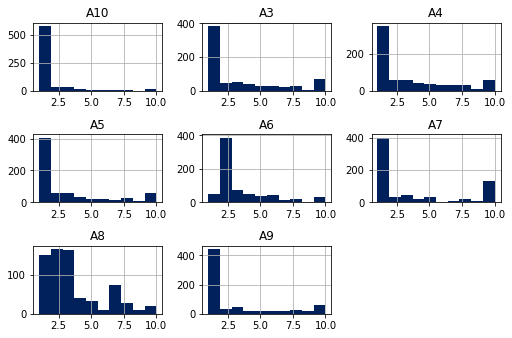

In [26]:
hist = bcd2.iloc[:,1:10].hist(
    grid = True, 
    bins = 10, 
    color = '#00215B',
    alpha = 1.0
)

plt.tight_layout(rect=(0,0,1.2,1.2))

Text(0, 0.5, 'count')

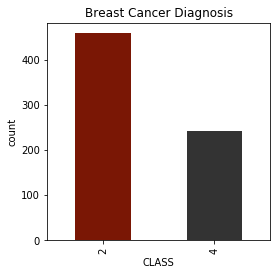

In [28]:
bar = bcd.groupby(['CLASS'])['Scn'].count().plot.bar(figsize=(4,4),color=('#7A1705','#333333'),title='Breast Cancer Diagnosis')
plt.ylabel('count')

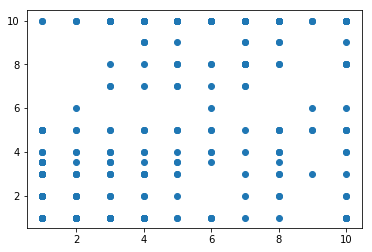

In [29]:
plt.scatter(bcd2.A4,bcd2.A7, marker='o')

c:\program files (x86)\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\program files (x86)\python37-32\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\program files (x86)\python37-32\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


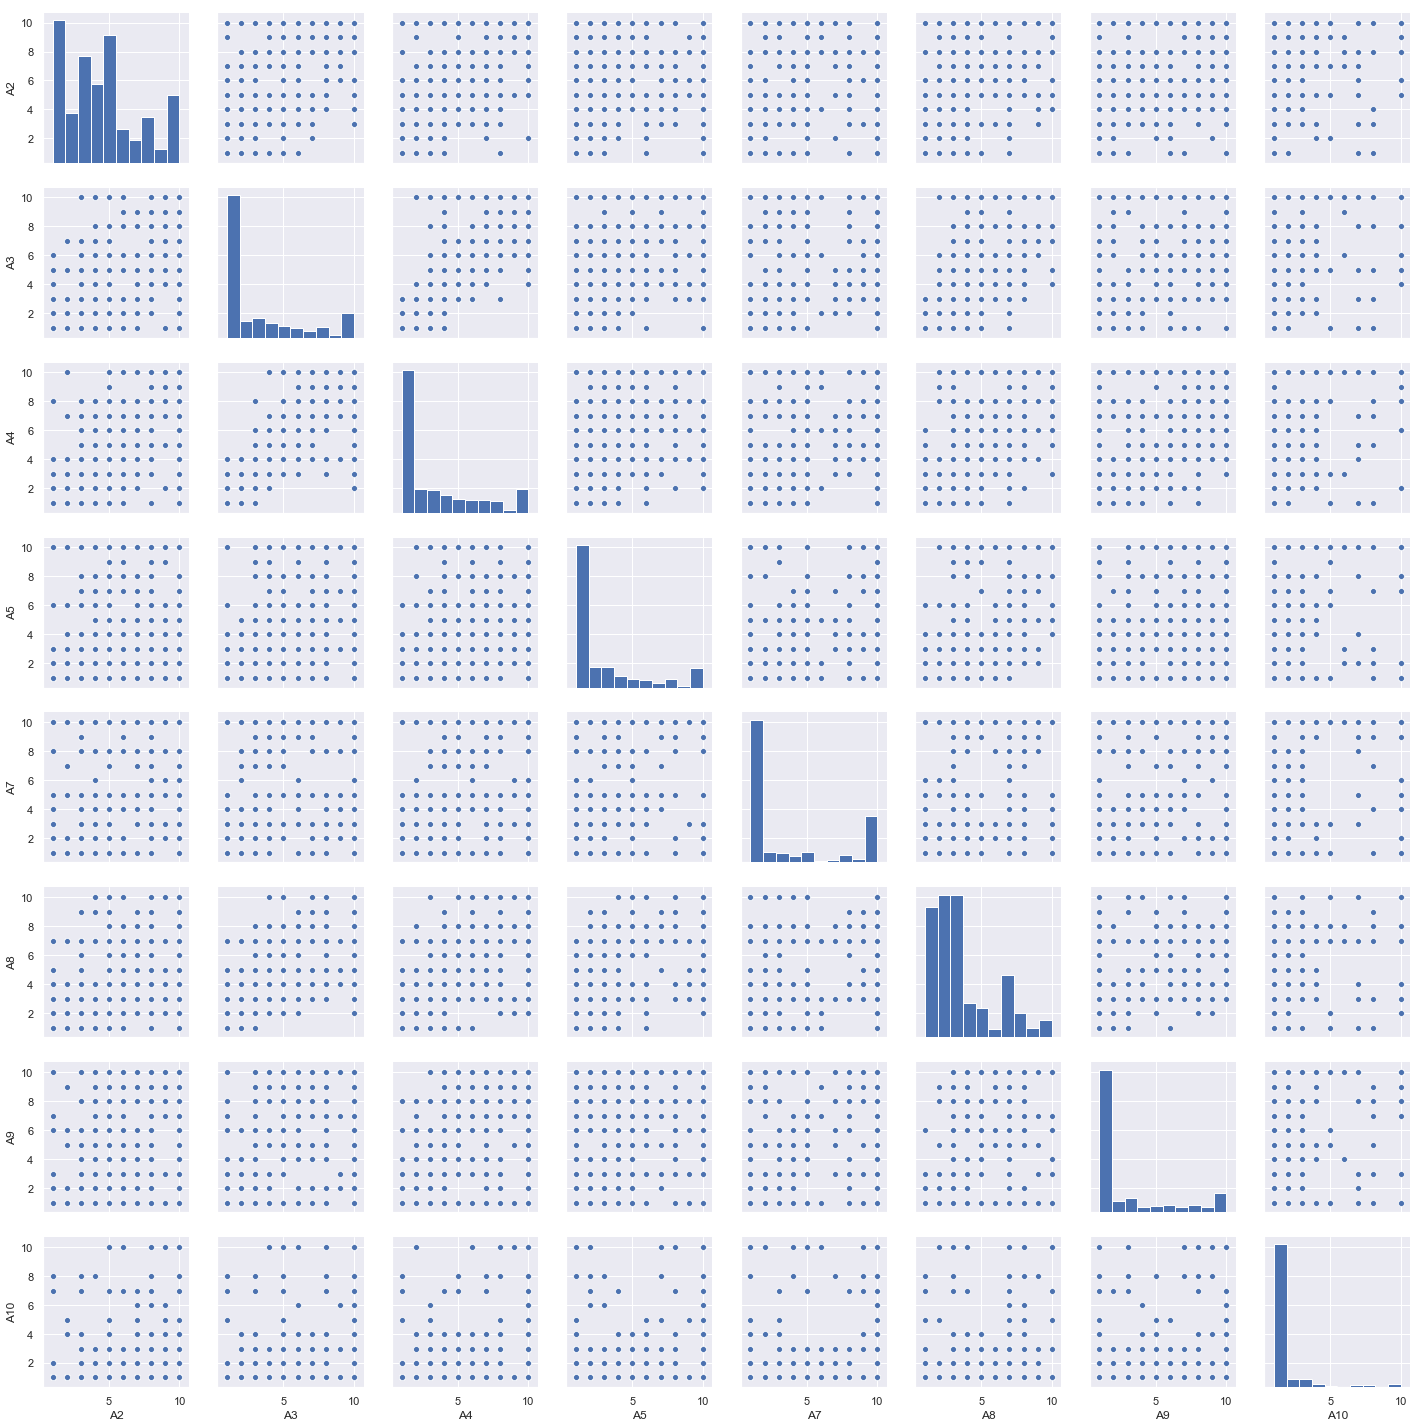

In [30]:
sns.set()
cols = ['A2', 'A3', 'A4', 'A5','A7', 'A8', 'A9', 'A10']
sns.pairplot(bcd2[cols], size = 2.5)
plt.show()

> Columns A7, A3, A9 all have standard deviation greater than 3. A standard normal distribution has sd of 1. Probably these columns at least could use standardization.

> Beyond statics, I think there needs to a level of subject matter of expertise to make this decision. data scientist differentiate themselves from software developers and data engineers by having domian knowledge they marry with statics and data engineering